### Here I'm implementing matrix calculations of green matrix

In [1]:
import numpy as np
from source_helper import *
import matplotlib.pyplot as plt
% matplotlib inline
from time import time
from lapl_well import LaplWell
from helper import Helper
from well import Well
import pandas as pd
from time import time

In [2]:
# define a well in real space
xwd = 0.
ywd = 0.
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
n_stehf = 10
params = {"nseg": 20, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":1000, "ref_length":1.,
         "z_ref_length": 1}
real_well = Well(xwd, ywd, outer_bound, top_bound, bottom_bound, wtype, params, n_stehf)
well = real_well.lapl_well

In [3]:
s = 7
ys = np.linspace(-1, 1, 101)
pxys = np.zeros_like(ys)
pxys2 = np.copy(pxys)
for i, y in enumerate(ys):
    pxys[i] = well.p_lapl_xy(s, 0., y, well.zwd)

In [4]:
for i, y in enumerate(ys):
    pxys2[i] = well.p_lapl_xy(s, 0.5, y, well.zwd)

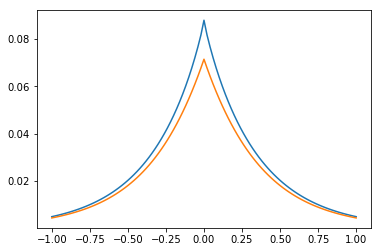

In [5]:
plt.plot(ys, pxys)
plt.plot(ys, pxys2)

In [18]:
t = 1
xs = np.linspace(-0.95, 0.95, 19)
ys = np.linspace(-1, 1, 21)
real_pxys = np.zeros((len(xs), len(ys)))
real_pxys2 = np.copy(real_pxys)
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        real_pxys[i,j] = real_well.get_p_xd_yd(t, x, y, well.zwd)

In [21]:
t = 0.1
real_src = real_well.get_source_distribution(t)

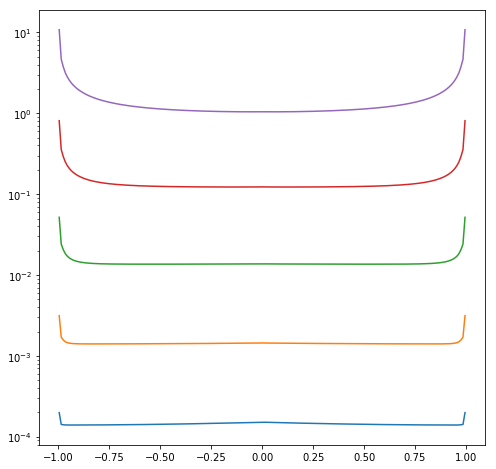

In [29]:
#plt.plot(np.array(real_well.lapl_well.gk.xcs)[0], real_src)
plt.figure(figsize=(8,8))
plt.yscale('log')
for t in [0.001, 0.01, 0.1, 1, 10]:
    real_src = real_well.get_source_distribution(t)
    plt.plot(np.array(real_well.lapl_well.gk.xcs)[0], real_well.lapl_well.source_distrib)
#plt.plot(np.array(real_well.lapl_well.gk.xcs)[0], real_src/real_well.lapl_well.source_distrib)

### Test liquid rate

In [3]:
ts = np.logspace(-3,1,41)
qs = np.zeros_like(ts)
Qs = np.zeros_like(ts)
for i, t in enumerate(ts):
    qs[i] = real_well.get_q(t)
    Qs[i] = real_well.get_cumulative_q(t)

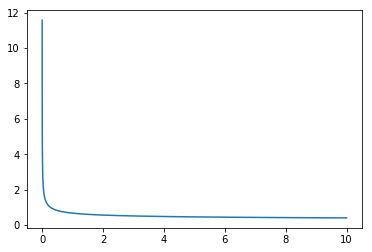

In [6]:
plt.figure()
#plt.xscale('log')
plt.plot(ts, qs)

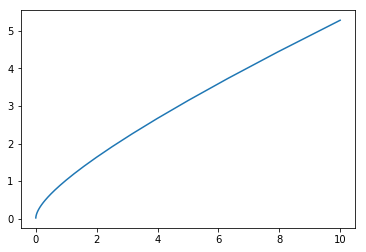

In [7]:
plt.figure()
#plt.xscale('log')
plt.plot(ts, Qs)

In [9]:
ts_1000 = 0.1*np.arange(1,1001)
qs_1000 = np.zeros_like(ts_1000)
for i, t in enumerate(ts_1000):
    qs_1000[i] = real_well.get_q(t)

In [10]:
cum_q = np.sum(qs_1000[1:1001])*0.1 + 0.05*(qs_1000[0]+qs_1000[-1])
print(cum_q)

33.3725140779


In [11]:
Q = real_well.get_cumulative_q(ts_1000[-1])
print(Q)

33.5970192793


### Liquid rate and cumulative liquid work well

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [21]:
real_pxys.shape

(19, 21)

In [27]:
X.shape
Y.shape
real_pxys.T.shape

(21, 19)

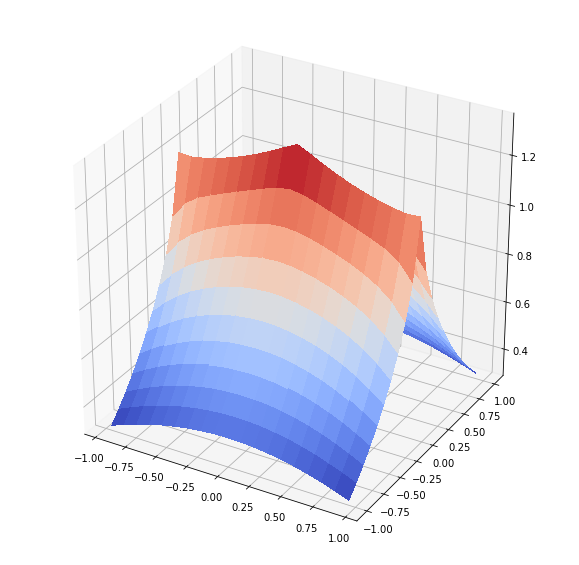

In [29]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(xs, ys)
surf = ax.plot_surface(X, Y, real_pxys.T, cmap=cm.coolwarm, linewidth=0, antialiased=False)

In [15]:
real_pxys2

array([ 0.29829627,  0.30591823,  0.31370107,  0.32164769,  0.32976112,
        0.33804449,  0.34650102,  0.35513409,  0.36394718,  0.37294393,
        0.38212815,  0.39150383,  0.40107516,  0.41084657,  0.42082271,
        0.43100854,  0.44140931,  0.45203064,  0.46287853,  0.47395943,
        0.48528029,  0.49684863,  0.50867261,  0.52076114,  0.53312396,
        0.54577179,  0.55871646,  0.57197111,  0.58555038,  0.59947068,
        0.61375051,  0.62841084,  0.6434756 ,  0.65897228,  0.67527987,
        0.69061301,  0.70784595,  0.72618706,  0.74423636,  0.76326393,
        0.78309256,  0.80387003,  0.82575399,  0.84894747,  0.8737304 ,
        0.90050176,  0.92986082,  0.96277326,  1.00093984,  1.04800071,
               nan,  1.04800071,  1.00093984,  0.96277326,  0.92986082,
        0.90050176,  0.8737304 ,  0.84894747,  0.82575399,  0.80387003,
        0.78309256,  0.76326393,  0.74423636,  0.72618706,  0.70784595,
        0.69061301,  0.67527987,  0.65897228,  0.6434756 ,  0.62

In [16]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [21]:
x = np.linspace(-1,1,101)

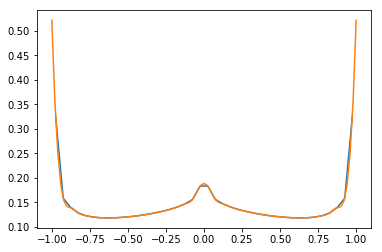

In [23]:
plt.figure
plt.plot(xs, qs)
for order in range(3, 4):
    s = InterpolatedUnivariateSpline(xs, qs, k=order)
    y = s(x)
    plt.plot(x, y)
plt.show()

In [10]:
from scipy.integrate import romberg, quadrature, fixed_quad
from scipy.special import k0
from time import time

In [36]:
fi = InterpolatedUnivariateSpline(xs, qs, k=2)
xd = 0.5
yd = 0.3
g = lambda x: fi(x)*k0(((xd-xwd-x)**2+(ywd-yd)**2)**0.5)

In [37]:
t1 = time()
romberg(fi, -1, 1, rtol=1e-6)
print(romberg(fi, -1, 1, rtol=1e-6), time()-t1)

0.287134547777 0.06600379943847656


C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.249971e-07
  AccuracyWarning)


In [65]:
fi = InterpolatedUnivariateSpline(xs, qs, k=4)
xd = 0.5
yd = 0.3
g = lambda x: fi(x)*k0(((xd-xwd-x)**2+(ywd-yd)**2)**0.5)
t1 = time()
romberg(g, -1, 1, rtol=1e-6)
print(romberg(fi, -1, 1, rtol=1e-6), time()-t1)

0.288263827467 0.022001266479492188


### Speed test

In [68]:
N = 10000
ss = 1000*np.random.sample(N)
ss = ss[ss!=0.]

In [69]:
q_array = np.zeros((N, 2*well.params["nseg"]))

In [70]:
for i, s in enumerate(ss):
    well.recalc(s)
    q_array[i,...] = well.source_distrib

In [71]:
xds = 20*(np.random.sample(N) - 0.5)
yds = 20*(np.random.sample(N) - 0.5)

In [72]:
xcs = np.array(well.gk.xcs)[0]

In [73]:
t1 = time()
for i, (xd, yd) in enumerate(zip(xds, yds)):
    q = q_array[i,...]
    fi = InterpolatedUnivariateSpline(xcs, q, k=4)
    g = lambda x: fi(x)*k0(((xd-well.xwd-x)**2+(well.ywd-yd)**2)**0.5)
    r = romberg(g, -1, 1, rtol=1e-6)
print(time()-t1)

30.42374014854431


In [74]:
t1 = time()
for i, (xd, yd) in enumerate(zip(xds, yds)):
    q = q_array[i,...]
    fi = InterpolatedUnivariateSpline(xcs, q, k=4)
    g = lambda x: fi(x)*k0(((xd-well.xwd-x)**2+(well.ywd-yd)**2)**0.5)
    r = quad(g, -1, 1, epsrel=1e-6)
print(time()-t1)

67.01883339881897


In [78]:
t1 = time()
for i, (xd, yd) in enumerate(zip(xds, yds)):
    q = q_array[i,...]
    fi = InterpolatedUnivariateSpline(xcs, q, k=4)
    g = lambda x: fi(x)*k0(((xd-well.xwd-x)**2+(well.ywd-yd)**2)**0.5)
    r = quadrature(g, -1, 1, rtol=1e-6)
print(time()-t1)

C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 4.074814e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.857043e-07
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.907296e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.034882e-07
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.190493e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.057444e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.p

C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.533484e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.686210e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 4.349029e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 4.054537e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.442445e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.751578e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.p

C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.934684e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 5.172291e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 5.507495e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 7.680639e-07
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 4.087437e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 3.427817e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.p

C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.170364e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.026613e-07
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.914689e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.437717e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.507644e-06
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 3.538668e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.p

C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.502291e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 3.106301e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 3.671508e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.599702e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 3.401055e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.700236e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.p

C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 5.086102e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 3.947476e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.499509e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.921046e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.715315e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.184759e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.p

C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.601382e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.249546e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 5.298510e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.592968e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.598649e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.634854e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.p

C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 3.344866e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 9.406476e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.490170e-07
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 5.356345e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.640072e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.976951e-07
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.p

C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.075559e-06
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.595515e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.607334e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.590284e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.998668e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.780811e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.p

C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.488633e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.027925e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.072533e-07
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 5.595341e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 6.273785e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.853708e-08
  AccuracyWarning)
C:\data_sci\lib\site-packages\scipy\integrate\quadrature.p

22.250272512435913


In [80]:
t1 = time()
for i, (xd, yd) in enumerate(zip(xds, yds)):
    q = q_array[i,...]
    fi = InterpolatedUnivariateSpline(xcs, q, k=4)
    g = lambda x: fi(x)*k0(((xd-well.xwd-x)**2+(well.ywd-yd)**2)**0.5)
    r = quad(g, -1, 1)
print(time()-t1)

1.3290762901306152


In [7]:
s = 7.5
xd = 0.5
well.recalc(s)
fi = well.smoothed_distrib
g = lambda x: fi(x)*k0(((xd-well.xwd-x)**2)**0.5)
r = quad(g, -1, 1)

NameError: name 'xd' is not defined